# 第四章

In [1]:
! apt install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
xz-utils is already the newest version (5.2.2-1.3).
xz-utils set to manually installed.
curl is already the newest version (7.58.0-2ubuntu3.8).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-ipadic mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-ipadic
  mecab-ipadic-utf8 mecab-jumandic mecab-jumandic-utf8 mecab-utils
0 upgraded, 11 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.3 MB of archives.
After this operation, 282 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.3 [184 kB]
Get:2 

In [4]:
! pip install mecab-python3

     |████████████████████████████████| 17.1MB 5.2MB/s 


In [0]:
import MeCab

In [0]:
m = MeCab.Tagger()

In [7]:
print(m.parse("すべての変更を保存しました"))

すべて	名詞,副詞可能,*,*,*,*,すべて,スベテ,スベテ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
変更	名詞,サ変接続,*,*,*,*,変更,ヘンコウ,ヘンコー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
保存	名詞,サ変接続,*,*,*,*,保存,ホゾン,ホゾン
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
まし	助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
EOS



In [0]:
with open("neko.txt", "r", encoding="utf-8") as f:
  s = f.read()

In [0]:
res = m.parse(s)

In [0]:
with open("neko.txt.mecab", "w", encoding="utf_8") as f:
  f.write(res)

In [0]:
import re

In [98]:
res

Output hidden; open in https://colab.research.google.com to view.

## 30

In [0]:
full = []
sent = []

for line in res.split("\n"):
  data = re.split(r"[\t,]", line)
  if data[0] == "\u3000" or data[0] == "。":
    full.append(sent)
    sent = []
    continue
  try:
    part = {}
    part['surface'] = data[0]
    part['pos'] = data[1]
    part['pos1'] = data[2]
    if part['pos'] in ('動詞', '助動詞', '形容詞'):
      part['base'] = data[7]
    else:
      part['base'] = data[0]
    
    sent.append(part)
  except:
    continue


In [0]:
full

## 31

In [0]:
# flatten
from itertools import chain

In [0]:
full_flat = list(chain.from_iterable(full))

In [0]:
surfaces = list(map(lambda x: x['surface'], filter(lambda x: x['pos'] == "動詞", full_flat)))

In [0]:
surfaces

## 32

In [0]:
bases = list(map(lambda x: x['base'], filter(lambda x: x['pos'] == "動詞", full_flat)))

In [0]:
bases

## 33

In [0]:
res = []
for i, word in enumerate(full_flat):
  if word['base'] == 'の' and full_flat[i-1]['pos'] == "名詞" and full_flat[i+1]['pos'] == "名詞":
    res.append(full_flat[i-1:i+2])

In [0]:
res

## 34

In [0]:
longest = 0
longest_range = [0,0]

now = 0
now_start = 0

for i, word in enumerate(full_flat):
  if word['pos'] == '名詞':
    if now == 0:
      now_start = i
    now += 1
  else:
    if now != 0:
      if now > longest:
        longest_range = [now_start, i]
        longest = now
        now = 0


In [0]:
a = list(map(lambda x: x['pos'] == '名詞', full_flat))

In [0]:
longest = 0
long_start = 0

now = 0
start = 0
for i, wh in enumerate(a):
  if wh:
    if not now:
      start = i
    now += 1
  else:
    if now:
      if now > longest:
        longest = now
        long_start = start
      start = 0
      now = 0

In [66]:
longest

10

In [67]:
long_start

30135

In [0]:
full_flat[30100:30200]

## 35

In [0]:
words = list(map(lambda x: x['base'], full_flat))

In [0]:
from collections import Counter

In [0]:
count = Counter(words)

In [0]:
top_data = sorted(count.items(), key=lambda x: -x[1])[:10]

In [0]:
import matplotlib.pyplot as plt

In [0]:
label = list(map(lambda x: x[0], top_data))
value = list(map(lambda x: x[1], top_data))

plt.bar(label, value)
# ランタイム再起動がめんどくさいから日本語化はしない（わかるし）

## 37

In [0]:
# とりあえず文ごと
def neko_search(sent_list):
  for i in sent_list:
    if i['base'] == "猫":
      return True
  return False

neko_sentence = list(filter(neko_search, full))


In [103]:
print(len(neko_sentence), len(full))

221 7897


In [0]:
coocc = []

for sent in neko_sentence:
  words = list(set(map(lambda x: x['base'], sent)))
  coocc.extend(words)

In [0]:
co_count = Counter(coocc)

In [113]:
# すべて
sorted(co_count.items(), key=lambda x: -x[1])[:10]

[('猫', 221),
 ('の', 173),
 ('は', 165),
 ('だ', 140),
 ('を', 132),
 ('て', 131),
 ('に', 127),
 ('と', 126),
 ('、', 125),
 ('が', 119)]

In [0]:
coocc = []

for sent in neko_sentence:
  words = list(set(map(lambda x: x['base'], filter(lambda x: x['pos'] == "名詞", sent))))
  coocc.extend(words)

In [0]:
co_count = Counter(coocc)

In [116]:
# 名詞のみ
sorted(co_count.items(), key=lambda x: -x[1])[:10]

[('猫', 221),
 ('吾輩', 57),
 ('の', 48),
 ('事', 47),
 ('人間', 35),
 ('よう', 32),
 ('もの', 30),
 ('主人', 23),
 ('一', 17),
 ('何', 13)]

In [0]:
# 吾輩は猫なので吾輩がナンバーワン

## 38

(array([1.1917e+04, 1.3000e+01, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.1960e+02, 1.8382e+03, 2.7568e+03, 3.6754e+03,
        4.5940e+03, 5.5126e+03, 6.4312e+03, 7.3498e+03, 8.2684e+03,
        9.1870e+03]),
 <a list of 10 Patch objects>)

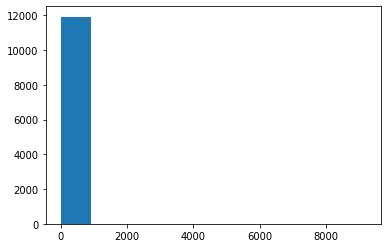

In [124]:
plt.hist(count.values())

In [0]:
# みえぬ

## 39

In [0]:
c_sorted = sorted(count.items(), key=lambda x: -x[1])

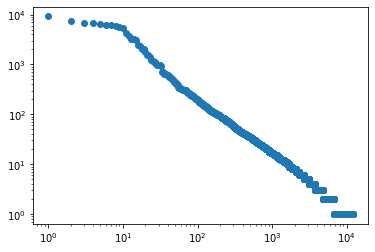

In [129]:
plt.scatter(range(1, len(c_sorted)+1), list(map(lambda x: x[1], c_sorted)))
plt.xscale('log')
plt.yscale('log')

Zipf（ジップ）の法則、べき乗則